## This plot shows that metabolites selected for the project are among the most abundant ones in E.Coli

In [59]:
from pathlib import Path
from definitions import ROOT_DIR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif',
             'sans-serif':['Helvetica'],
             'size':16})

- Inputs

In [3]:
p_root_dir = Path(ROOT_DIR).parent
p_analysis = p_root_dir / "6_plots\q1_plots"

# Compunds used in the study
p_compounds = p_root_dir / "5_data_analysis/compounds_ids.csv"

# Mapping to absolute metabolite abundance in E.Coli (Bennett, ... , Rabinowitz, 2009)
p_abundance = p_root_dir / "5_data_analysis/absolute_abundance.csv"

- Load data

In [20]:
compounds = pd.read_csv(p_compounds, index_col='internal_id')
# Remove entries for thermometer ions and fiducials
compounds = compounds[compounds.hmdb_primary != 'custom'][['name_short', 'hmdb_primary']]

abundance = pd.read_csv(p_abundance)
abundance['logC'] = np.log10(abundance["Concentration / M"])
abundance['Concentration / mM'] = abundance["Concentration / M"]*1000
abundance['covered'] = ~abundance.name_short.isna()
abundance.sort_values(by="Concentration / M", ascending=False, inplace=True)

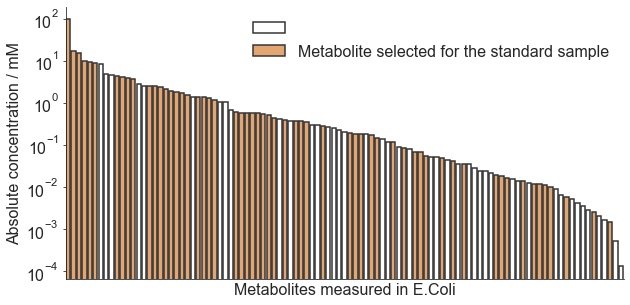

In [142]:
palette = {True:"sandybrown",
           False:"white"} #slategrey

sns.set_style("white")
plt.figure(figsize = (10,5))
g = sns.barplot(x="Name in paper", 
                y="Concentration / mM", hue="covered", 
                data=abundance, 
                
                # Bar appearance
                palette=palette,
                dodge=False,
                linewidth=1.5,
                edgecolor=".2")
# Edit plot area
sns.despine()

# Edit axes
g.set(xticks=[], xlabel='Metabolites measured in E.Coli', ylabel='Absolute concentration / mM')
g.set_yscale('log')
g.tick_params(left=True)

# Edit legend
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, ['','Metabolite selected for the standard sample'], frameon=False)

In [139]:
g.figure.savefig(p_analysis / f"abundance_plot.pdf")